In [122]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def load_data(filename):
    with open(filename) as jsonfile:
      data = json.load(jsonfile)
    df = pd.DataFrame(data['VeloTracks']).T
    df['x'] = df['ClosestToBeam'].map(lambda l: l[0])
    df['y'] = df['ClosestToBeam'].map(lambda l: l[1])
    df['z'] = df['ClosestToBeam'].map(lambda l: l[2])
    df['dx'] = df['ClosestToBeam'].map(lambda l: l[3])
    df['dy'] = df['ClosestToBeam'].map(lambda l: l[4])
    df['cov_x'] = df['errCTBState'].map(lambda l: l[0])
    df['cov_y'] = df['errCTBState'].map(lambda l: l[1])
    df['cov_dx'] = df['errCTBState'].map(lambda l: l[2])
    df['cov_dy'] = df['errCTBState'].map(lambda l: l[3])
    df['cov_xdx'] = df['errCTBState'].map(lambda l: l[4])
    df['event'] = data['EventNumber']
    df['run'] = data['RunNumber']
    df = df.drop('ClosestToBeam', axis=1).drop('errCTBState', axis=1)
    return df

d = load_data("data/train/RapidVPData_6915602_43455.json")


In [123]:
zs = list(d["z"])
zs
hist = np.histogram(zs, bins = 100)[0]

In [124]:
%matplotlib inline

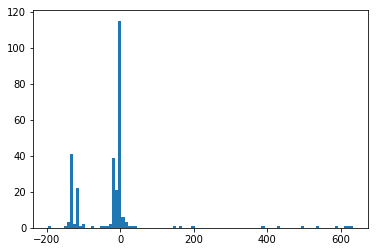

In [125]:
plt.hist(zs, bins=100)
plt.show()

In [127]:
print(find_peaks(hist, height = 5))

(array([ 7,  9, 21, 23]), {'peak_heights': array([ 41.,  22.,  39., 115.])})
